<a href="https://colab.research.google.com/github/mdeasinkhandokar/Machine_Learning/blob/main/CNN_Data_Augmention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
#Load flowers dataset
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/sunflowers/7176729016_d73ff2211e.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4989952542_35f2cdd5e2_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6061177447_d8ce96aee0.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5067864967_19928ca94c_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9491955955_d0b2c83834.jpg')]

In [7]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [13]:
roses=list(data_dir.glob('flower_photos/rose/*'))
roses[:5]


[]

In [22]:
if not roses:
    print("Warning: No rose images found. Check file paths and dataset.")
else:
    PIL.Image.open(str(roses[0]))

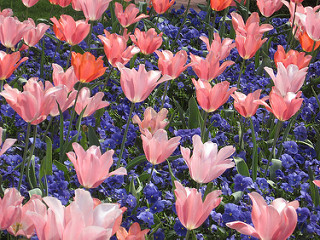

In [23]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [32]:
#Read flowers images from disk into numpy array array using  openCV
flowers_images_dict={
    'roses':list(data_dir.glob('flower_photos/rose/*')), # Changed 'flower_photos/roses/*' to 'flower_photos/rose/*'
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [33]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [34]:
flowers_images_dict['roses'][:5]


[]

In [37]:
str(flowers_images_dict['tulips'][1])


'datasets/flower_photos/tulips/13531007054_c88deaf302_n.jpg'

In [38]:
img=cv2.imread(str(flowers_images_dict['tulips'][0]))

In [39]:
img.shape

(224, 320, 3)

In [40]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [41]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [42]:
X=np.array(X)
y=np.array(y)

In [43]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [44]:
#preprocessing:Scale images
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [52]:
#Build convolutional neural network and train it
num_classes=5

model =Sequential([
    layers.Conv2D(16,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)


])

model.compile(optimizer ='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']

              )

model.fit( X_train_scaled,y_train, epochs = 1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4056 - loss: 1.3391


In [53]:
model.evaluate(X_test_scaled,y_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.6304 - loss: 0.9064


[0.9168194532394409, 0.6213720440864563]

In [54]:
predictions=model.predict(X_test_scaled)
predictions

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step


array([[-5.203951  ,  0.2995369 ,  1.2979233 ,  0.7651895 ,  0.35022366],
       [-6.502744  ,  1.8407624 ,  0.4320187 , -0.24974248,  0.49042314],
       [-5.243692  ,  2.4019296 ,  0.27366433, -1.2017204 ,  0.10068082],
       ...,
       [-4.511395  ,  0.56366926,  0.22443266,  0.3886316 ,  0.9506619 ],
       [-4.760022  ,  0.68266004,  2.0944028 , -1.0106698 , -0.9790311 ],
       [-4.06613   , -0.14369354,  1.6433525 ,  2.259675  , -0.8800602 ]],
      dtype=float32)

In [55]:
score=tf.nn.softmax(predictions[0])
np.argmax(score)

2

In [56]:
y_test[0]

2

In [61]:
#improve the test accuracy using Data Augmentation
img_height = 180  # Assuming image height is 180 based on previous code
img_width = 180   # Assuming image width is 180 based on previous code

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", # Changed from layers.experimental.preprocessing.RandomFlip
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),

    layers.RandomRotation(0.1), # Changed from layers.experimental.preprocessing.RandomRotation
    layers.RandomZoom(0.1), # Changed from layers.experimental.preprocessing.RandomZoom
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


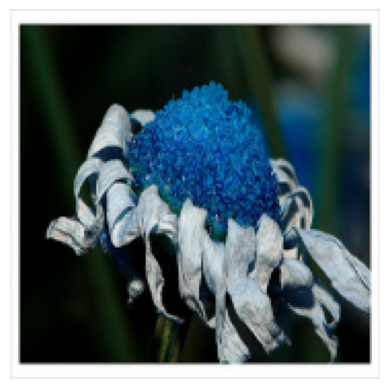

In [62]:
plt.axis('off')
plt.imshow(X[0])

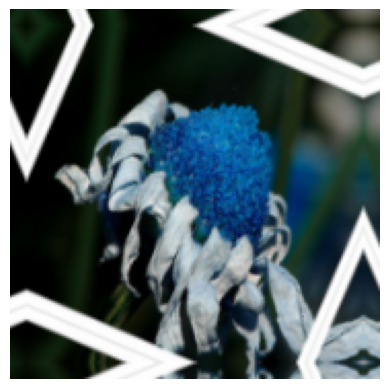

In [63]:
#newly generated training sample using data augmentation
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [65]:
#train model using data augmentation and a drop out layer

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.4332 - loss: 1.3437


In [66]:
model.evaluate(X_test_scaled,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 261ms/step - accuracy: 0.6568 - loss: 0.8901


[0.8730136752128601, 0.6530343294143677]